# Задание
Постройте топ фильмов в категориях Action и Comedy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
def plot_barplots(ds, f, xlabel, suptitle, figsize=(20,7)):
    plt.figure(figsize=figsize)
    for idx, g in enumerate(['Action','Comedy']):
        plt.subplot(1,2,idx+1)
        s = ds[ds[f'GENRE__{g}']][f].sort_values(ascending=False).head(10)
        sns.barplot(x=s.values, y=s.index)
        plt.title(f'Лучшие {g} фильмы')
        plt.ylabel('')
        plt.xlabel(xlabel)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle(suptitle)
    plt.show()    

In [4]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [5]:
GENRES = set('|'.join(movies['genres'].values).split('|'))

In [6]:
for v in GENRES:
    movies[f'GENRE__{v}'] = [v in x.split('|') for x in movies['genres']]

In [7]:
mov_rate_ds = pd.merge(movies, ratings, on='movieId')

Топ фильмов по оценкам

In [8]:
cds = mov_rate_ds.groupby('title').agg({'movieId':'max','GENRE__Action':'max','GENRE__Comedy':'max','rating':'mean','timestamp':'count'})
cds = cds.rename(columns={'timestamp':'n_ratings'})

Топ фильмов по оценкам и количествам рейтингов

In [9]:
cds['n_ratings_norm'] = (cds['n_ratings']-cds['n_ratings'].min())/(cds['n_ratings'].max()-cds['n_ratings'].min())
cds['rating_weighted'] = cds['rating']*cds['n_ratings_norm']

Топ фильмов по оценкам, кол-ву рейтингов и кол-ву тегов

In [10]:
d = tags.groupby('movieId')['tag'].nunique().to_dict()
cds['n_tags'] = cds['movieId'].apply(lambda x: d.get(x,0))
cds['n_tags_cleanse'] = [min(x,10) for x in cds['n_tags']] #т.к. кто-то поставил Pulp Fiction 173 тега
cds['n_tags_norm'] = (cds['n_tags_cleanse'])/(10)
cds['rating_weighted_tags'] = cds['rating_weighted']*cds['n_tags_norm']

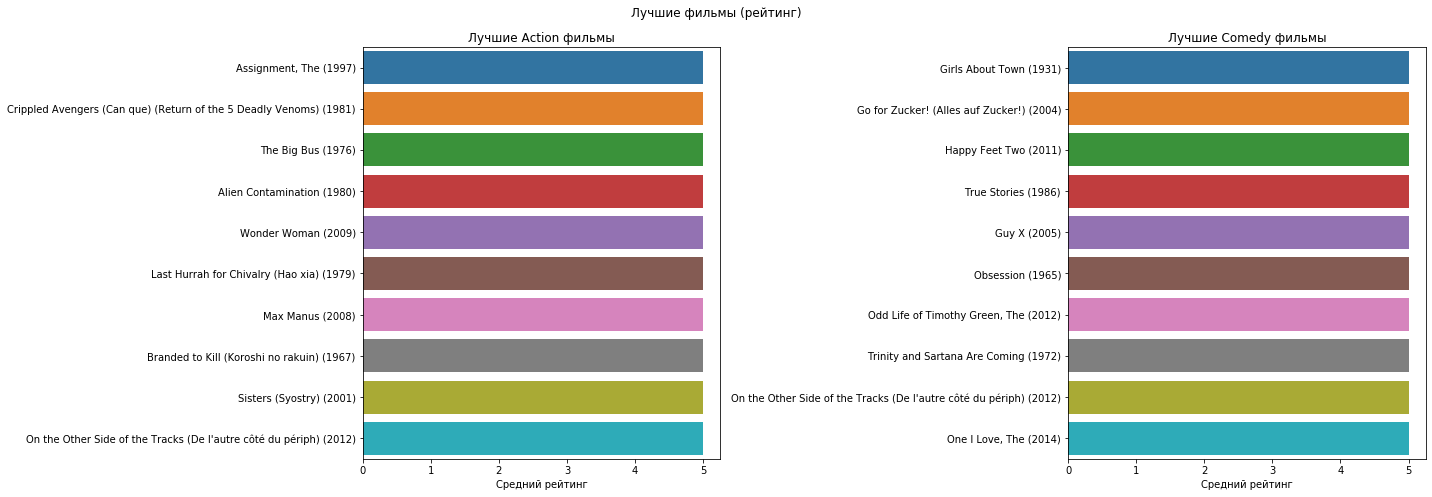

In [11]:
plot_barplots(cds, 'rating', 'Средний рейтинг', 'Лучшие фильмы (рейтинг)')

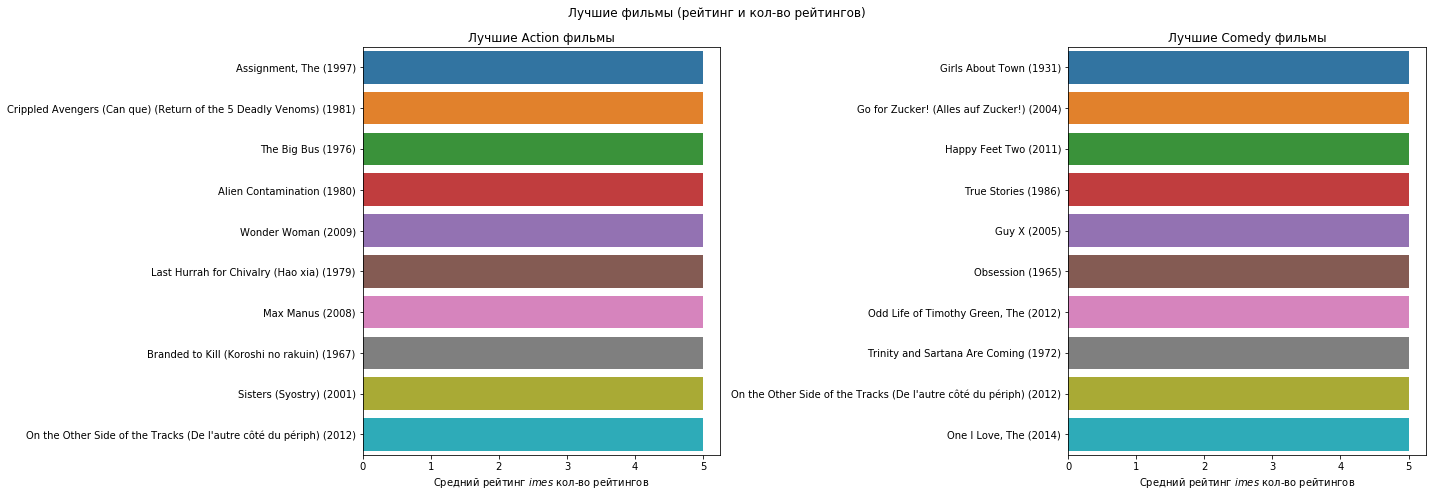

In [12]:
plot_barplots(cds, 'rating', 'Средний рейтинг $\times$ кол-во рейтингов', 'Лучшие фильмы (рейтинг и кол-во рейтингов)')

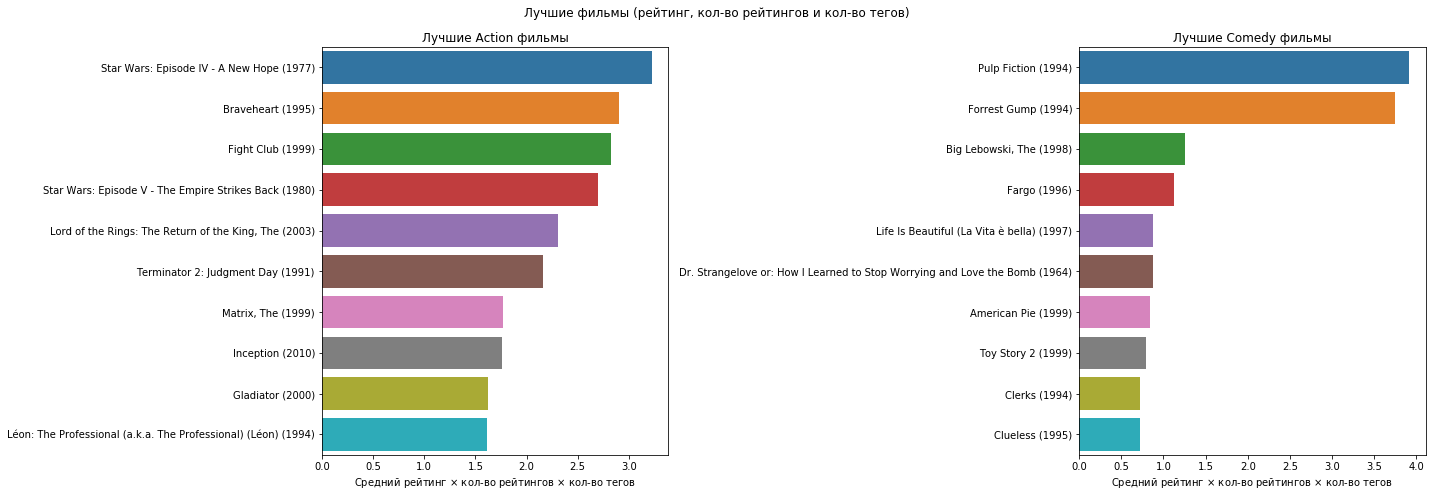

In [13]:
plot_barplots(cds, 'rating_weighted_tags', r'Средний рейтинг $\times$ кол-во рейтингов $\times$ кол-во тегов', 'Лучшие фильмы (рейтинг, кол-во рейтингов и кол-во тегов)')